In [1]:
import h5py
import numpy as np
fh5 = h5py.File('07_fmap_BLCA.h5','r')
img = fh5['map']
img = np.array(img)
print(img.shape)
lab = fh5['lab']
lab = np.array(lab)
print(lab.shape)

(191, 33, 33)
(191,)


In [2]:
lab

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1.])

In [3]:
img3 = np.zeros((len(lab), 33, 33, 3))

In [4]:
import time
from tqdm import tqdm
from tqdm._tqdm import trange

C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\ipykernel_launcher.py:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.std.*` instead of `tqdm._tqdm.*`
  This is separate from the ipykernel package so we can avoid doing imports until


In [5]:
for i in tqdm(range(len(lab))):
    time.sleep(0.01)
    for j in range(3):
        img3[i,:,:,j] = img[i,:,:]

100%|██████████| 191/191 [00:03<00:00, 59.14it/s]


In [6]:
img3.shape

(191, 33, 33, 3)

In [7]:
img33 = np.uint8(img3)

In [8]:
img33.max()

255

In [9]:
img33.shape

(191, 33, 33, 3)

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

(-0.5, 32.5, 32.5, -0.5)

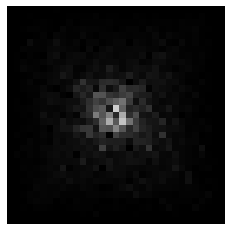

In [11]:
plt.imshow(img33[0])
plt.axis('off')

(-0.5, 32.5, 32.5, -0.5)

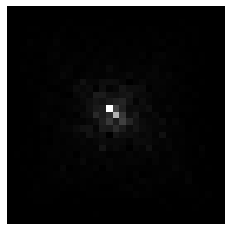

In [12]:
plt.imshow(img[0],"gray")
plt.axis('off')

In [13]:
std = np.mean(img,axis=0)
std.shape

(33, 33)

(-0.5, 32.5, 32.5, -0.5)

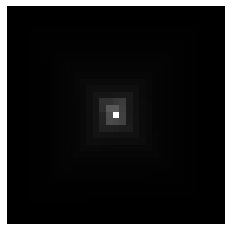

In [14]:
plt.imshow(std,"gray")
plt.axis('off')

In [15]:
imgcf = np.zeros((2, 33, 33, 3))

In [16]:
m=0
for i in tqdm(range(len(lab)-1)):
    time.sleep(0.01)
    if lab[i]!=lab[i+1]:
        labnode=i

100%|██████████| 190/190 [00:03<00:00, 59.55it/s]


In [17]:
lab[:labnode+1]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [18]:
lab[labnode+1:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [19]:
imga = img[:labnode+1,:,:]
imgb = img[labnode+1:,:,:]

In [20]:
img3a = img3[:labnode+1,:,:,:]
img3b = img3[labnode+1:,:,:,:]

In [21]:
import scipy.stats as stats

In [22]:
t_statistic, p_value = stats.ttest_ind(imga, imgb)

C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in greater
  return (a < x) & (x < b)
C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:903: RuntimeWarning: invalid value encountered in less
  return (a < x) & (x < b)
C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\scipy\stats\_distn_infrastructure.py:1912: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= _a)


In [23]:
p_value.shape

(33, 33)

In [24]:
std = np.mean(img,axis=0)
std.max()

791.4804656439792

In [25]:
stda = np.mean(imga,axis=0)
stda.max()

808.7800493263159

In [26]:
stdb = np.mean(imgb,axis=0)
stdb.max()

774.3610859583332

In [27]:
std3a = np.mean(img3a,axis=0)
std3a.max()

808.7800493263159

In [28]:
std3b = np.mean(img3b,axis=0)
std3b.max()

774.3610859583332

In [29]:
std.shape

(33, 33)

(-0.5, 32.5, 32.5, -0.5)

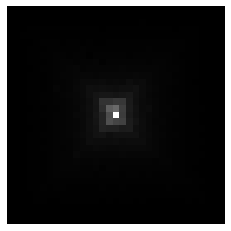

In [30]:
plt.imshow(stdb/stdb.max(),'gray')
plt.axis('off')

In [31]:
for i in tqdm(range(33)):
    time.sleep(0.01)
    for j in range(33):
        if p_value[i,j]<=0.01:
            if stda[i,j]>std[i,j]:
                std3a[i,j,0:2]=0
            if stda[i,j]<std[i,j]:
                std3a[i,j,1:3]=0
            if stdb[i,j]>std[i,j]:
                std3b[i,j,0:2]=0
            if stdb[i,j]<std[i,j]:
                std3b[i,j,1:3]=0

100%|██████████| 33/33 [00:00<00:00, 59.63it/s]


In [32]:
std3au = np.uint8(std3a)
std3bu = np.uint8(std3b)

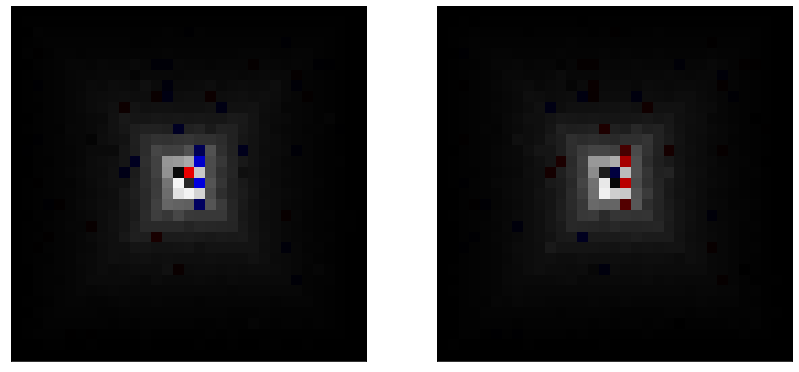

In [33]:
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1),plt.imshow(std3au), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(std3bu), plt.xticks([]), plt.yticks([])
plt.show()

In [34]:
img3al = np.zeros((len(imga), 33, 33, 3))
img3al.shape

(95, 33, 33, 3)

In [35]:
for i in tqdm(range(len(imga))):

    img_1 = imga[i]
    img_2 = img3a[i]
    #print(img1.shape)
    #std = np.mean(img_1,axis=0)
    #stdc = np.mean(img_2,axis=0)
    t_statistic, p_value = stats.ttest_ind(img_1, imgb)
    for ii in range(33):
        for jj in range(33):
            if p_value[ii,jj]<=0.01:
                if img_1[ii,jj]>std[ii,jj]:
                    img_2[ii,jj,0:2]=0
                if img_1[ii,jj]<std[ii,jj]:
                    img_2[ii,jj,1:3]=0
    img3al[i] =  img_2

100%|██████████| 95/95 [00:00<00:00, 601.92it/s]


In [36]:
img3al = np.uint8(img3al)

(-0.5, 32.5, 32.5, -0.5)

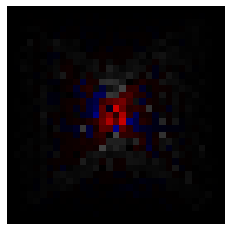

In [37]:
plt.imshow(img3al[0])
plt.axis('off')

In [38]:
img3bl = np.zeros((len(imgb), 33, 33, 3))
img3bl.shape

(96, 33, 33, 3)

In [39]:
for i in tqdm(range(len(imgb))):

    img_1 = imgb[i]
    img_2 = img3b[i]
    #print(img1.shape)
    #std = np.mean(img_1,axis=0)
    #stdc = np.mean(img_2,axis=0)
    t_statistic, p_value = stats.ttest_ind(img_1, imga)
    for ii in range(33):
        for jj in range(33):
            if p_value[ii,jj]<=0.01:
                if img_1[ii,jj]>std[ii,jj]:
                    img_2[ii,jj,0:2]=0
                if img_1[ii,jj]<std[ii,jj]:
                    img_2[ii,jj,1:3]=0
    img3bl[i] =  img_2

100%|██████████| 96/96 [00:00<00:00, 632.91it/s]


In [40]:
img3bl = np.uint8(img3bl)

(-0.5, 32.5, 32.5, -0.5)

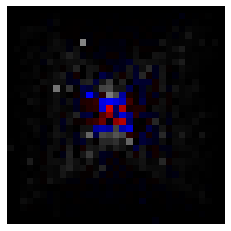

In [41]:
plt.imshow(img3bl[0])
plt.axis('off')

In [42]:
imgab = np.concatenate((img3al,img3bl),axis=0)
imgab.shape

(191, 33, 33, 3)

In [51]:
import os
main_path = os.path.join(os.getcwd(),r'E:/data/Survival/H5map/fmap/')
file_names = os.listdir(main_path)
print(file_names)

['fmap_BLCA.h5', 'fmap_BRCA.h5', 'fmap_HNSC.h5', 'fmap_KIRC.h5', 'fmap_LIHC.h5', 'fmap_LUAD.h5', 'fmap_LUSC.h5', 'fmap_OVxx.h5', 'fmap_SKCM.h5', 'fmap_STAD.h5']


In [52]:
ll = ['BLCA', 'BRCA', 'HNSC', 'KIRC', 'LIHC', 'LUAD', 'LUSC', 'OV', 'SKCM', 'STAD']

In [53]:
from tqdm import tqdm
from tqdm._tqdm import trange
import time

In [54]:
imgsca = np.zeros((10, 33, 33, 3))
imgscb = np.zeros((10, 33, 33, 3))
imgscau = np.zeros((10, 33, 33, 3))
imgscbu = np.zeros((10, 33, 33, 3))

In [55]:
m=0
labnode=0
for file_name in tqdm(file_names):
    
    time.sleep(0.01)
    file_path = os.path.join(main_path,file_name)
    fh5 = h5py.File(file_path,'r')
    img = fh5['map']
    img = np.array(img)
    #print(img.shape)
    lab = fh5['lab']
    lab = np.array(lab)
    #print(lab.shape)
    for i in range(len(lab)-1):
        if lab[i]!=lab[i+1]:
            labnode=i
            break
    #print(labnode)
    img3 = np.zeros((len(lab), 33, 33, 3))
    for i in range(len(lab)):
        for j in range(3):
            img3[i,:,:,j] = img[i,:,:]
    imga = img[:labnode+1,:,:]
    imgb = img[labnode+1:,:,:]
    img3a = img3[:labnode+1,:,:,:]
    img3b = img3[labnode+1:,:,:,:]
    #print(img3.shape)
    t_statistic, p_value = stats.ttest_ind(imga, imgb)
    std = np.mean(img,axis=0)
    stda = np.mean(imga,axis=0)
    stdb = np.mean(imgb,axis=0)
    std3a = np.mean(img3a,axis=0)
    std3b = np.mean(img3b,axis=0)
    for i in range(33):
        for j in range(33):
            if p_value[i,j]<=0.01:
                if stda[i,j]>std[i,j]:
                    std3a[i,j,0:2]=0
                if stda[i,j]<std[i,j]:
                    std3a[i,j,1:3]=0
                if stdb[i,j]>std[i,j]:
                    std3b[i,j,0:2]=0
                if stdb[i,j]<std[i,j]:
                    std3b[i,j,1:3]=0
    std3au = np.uint8(std3a)
    std3bu = np.uint8(std3b)
    imgsca[m] = std3a
    imgscb[m] = std3b
    imgscau[m] = std3au
    imgscbu[m] = std3bu
    m=m+1

100%|██████████| 10/10 [00:00<00:00, 63.81it/s]


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


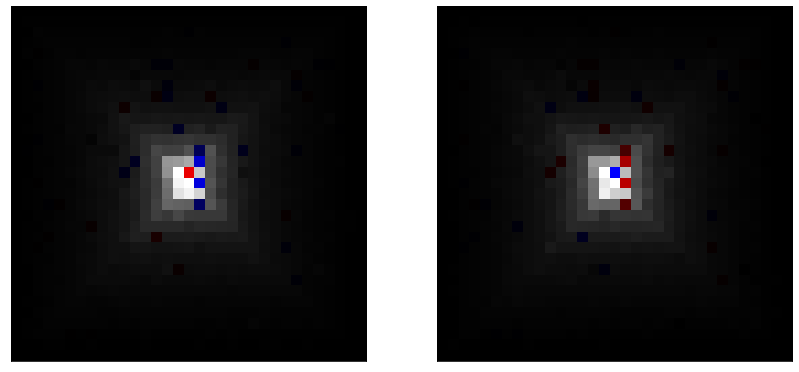

In [56]:
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1),plt.imshow(imgsca[0]/255), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgscb[0]/255), plt.xticks([]), plt.yticks([])
plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


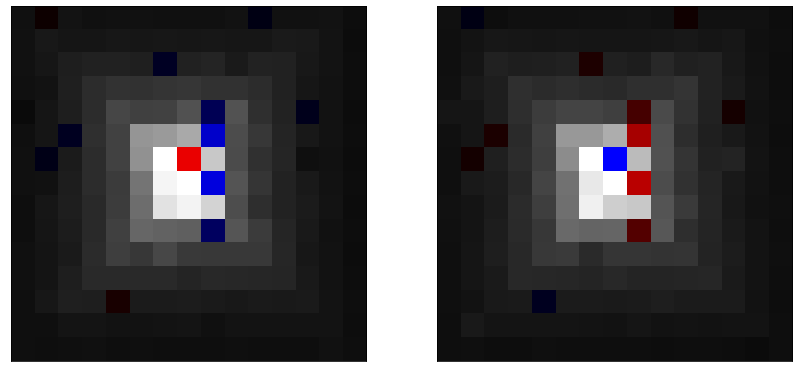

In [57]:
plt.figure(figsize=(14, 8))
plt.subplot(1,2,1),plt.imshow(imgsca[0,9:24,9:24,:]/255), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(imgscb[0,9:24,9:24,:]/255), plt.xticks([]), plt.yticks([])
plt.show()